In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in Csv
df = pd.read_csv("../Data/cleaned_df.csv")
df0 = pd.read_csv("../Data/cleaned_df0.csv")

# Analysis Part

In [3]:
df.head()

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,order_date_(DateOrders),Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Category_Id,Product_Name,Product_Price,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,no_risk,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,risk,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,no_risk,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,no_risk,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,no_risk,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180508 non-null  object 
 1   Days_for_shipping_(real)       180508 non-null  int64  
 2   Days_for_shipment_(scheduled)  180508 non-null  int64  
 3   Benefit_per_order              180508 non-null  float64
 4   Sales_per_customer             180508 non-null  float64
 5   Delivery_Status                180508 non-null  object 
 6   Late_delivery_risk             180508 non-null  object 
 7   Category_Name                  180508 non-null  object 
 8   Customer_City                  180508 non-null  object 
 9   Customer_Country               180508 non-null  object 
 10  Customer_Fname                 180508 non-null  object 
 11  Customer_Id                    180508 non-null  int64  
 12  Customer_Lname                

In [5]:
# Make a Dataframe for the top 10 products and its atrributes
top10_products = df.groupby("Product_Name").agg({"Order_Item_Quantity" : "count", "Order_Profit_Per_Order": "mean", "Order_Item_Total": "mean"}).reset_index()
top10_products

,Product_Name,Order_Item_Quantity,Order_Profit_Per_Order,Order_Item_Total
0,Adult dog supplies,492,7.295244,75.850203
1,Baby sweater,207,7.367295,52.934300
2,Bag Boy Beverage Holder,279,11.375556,68.136093
3,Bag Boy M330 Push Cart,69,43.030580,217.125507
4,Bowflex SelectTech 1090 Dumbbells,10,119.078000,517.189990
...,...,...,...,...
113,adidas Kids' F5 Messi FG Soccer Cleat,262,11.092863,93.994314
114,adidas Men's F10 Messi TRX FG Soccer Cleat,305,26.928098,165.095773
115,adidas Men's Germany Black Crest Away Tee,289,9.805260,66.712526
116,adidas Youth Germany Black/Red Away Match Soc,314,25.889809,194.388217


In [6]:
# Rename columns
top10_products[["Avg_Order_Profit_Per_Order", "Avg_Order_Item_Total"]] = top10_products[["Order_Profit_Per_Order", "Order_Item_Total"]]
# Drop unwanted columns
top10_products = top10_products[["Product_Name", "Order_Item_Quantity", "Avg_Order_Profit_Per_Order", "Avg_Order_Item_Total",]]
# sort_values
top10_products = top10_products.sort_values(by="Order_Item_Quantity", ascending=False).head(10)
#Dataframe
top10_products = pd.DataFrame(top10_products)

In [7]:
top10_products.reset_index()

,index,Product_Name,Order_Item_Quantity,Avg_Order_Profit_Per_Order,Avg_Order_Item_Total
0,71,Perfect Fitness Perfect Rip Deck,24515,20.143924,162.071400
1,56,Nike Men's CJ Elite 2 TD Football Cleat,22246,14.020625,116.807265
2,59,Nike Men's Dri-FIT Victory Golf Polo,21035,16.658951,134.476278
3,67,O'Brien Men's Neoprene Life Vest,19298,16.501784,134.545239
4,24,Field & Stream Sportsman 16 Gun Fire Safe,17325,43.649106,359.419064
5,70,Pelican Sunstream 100 Kayak,15500,20.908153,179.710844
6,21,Diamondback Women's Serene Classic Comfort Bi,13729,31.135230,269.559591
7,61,Nike Men's Free 5.0+ Running Shoe,12169,31.219970,270.826962
8,102,Under Armour Girls' Toddler Spine Surge Runni,10617,11.893992,107.447580
9,25,Fighting video games,837,3.233704,35.699211


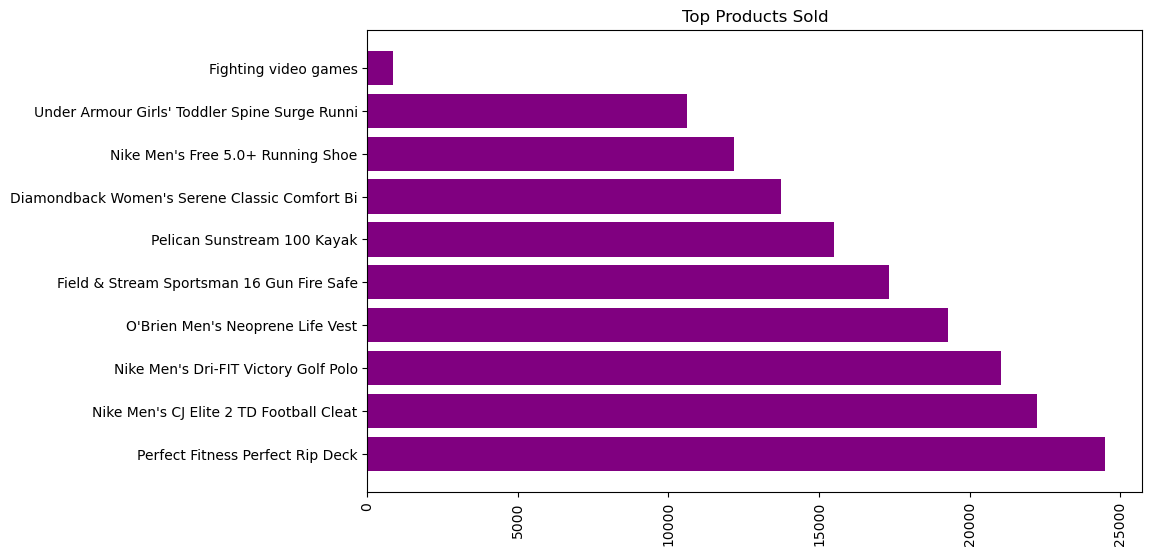

In [8]:
# Bar chart visualization
x = top10_products.Product_Name
y = top10_products.Order_Item_Quantity
plt.figure(figsize = (10,6))
plt.barh(x, y, color = "purple")
plt.xticks(rotation=90)
plt.title("Top Products Sold")
plt.show()

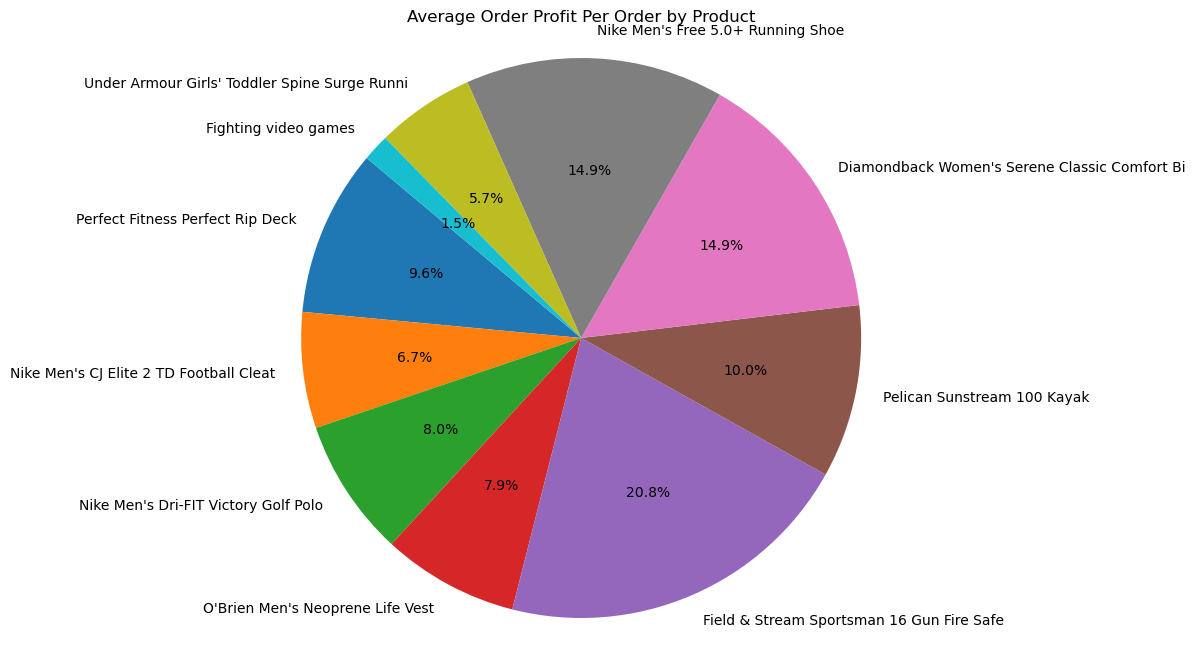

In [9]:
# Create a DataFrame with the provided data
data = {
    'Product_Name': [
        'Perfect Fitness Perfect Rip Deck',
        'Nike Men\'s CJ Elite 2 TD Football Cleat',
        'Nike Men\'s Dri-FIT Victory Golf Polo',
        'O\'Brien Men\'s Neoprene Life Vest',
        'Field & Stream Sportsman 16 Gun Fire Safe',
        'Pelican Sunstream 100 Kayak',
        'Diamondback Women\'s Serene Classic Comfort Bi',
        'Nike Men\'s Free 5.0+ Running Shoe',
        'Under Armour Girls\' Toddler Spine Surge Runni',
        'Fighting video games'
    ],
    'Avg_Order_Profit_Per_Order': [20.143924, 14.020625, 16.658951, 16.501784, 43.649106, 20.908153, 31.135230, 31.219970, 11.893992, 3.242864]
}

df1 = pd.DataFrame(data)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(df1['Avg_Order_Profit_Per_Order'], labels=df1['Product_Name'], autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Average Order Profit Per Order by Product')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [11]:
# 10 states that have the highest benfit per order
benefit_df = df.groupby("Customer_State").Benefit_per_order.sum().round(2)
benefit_df = pd.DataFrame(benefit_df).sort_values(by="Benefit_per_order", ascending=False).head(10)
benefit_df

,Benefit_per_order
Customer_State,
PR,1513216.07
CA,640654.59
NY,239429.93
TX,199370.29
IL,179835.32
FL,136256.96
OH,84621.71
MI,81339.50
PA,78245.07


In [12]:
# What states have the most delivery risk
delivery_df = df.groupby("Customer_State").Late_delivery_risk.value_counts()
delivery_df = pd.DataFrame(delivery_df).sort_values(by="count", ascending=False)
delivery_df

# Filter for rows where Late_delivery_risk is 'risk'
risk_df = delivery_df.loc[pd.IndexSlice[:, 'risk'], :].head(10)
risk_df

,,count
Customer_State,Late_delivery_risk,
PR,risk,37989
CA,risk,16179
NY,risk,6107
TX,risk,5027
IL,risk,4303
FL,risk,2942
OH,risk,2262
PA,risk,2049
MI,risk,2036
